In [1]:
import pandas as pd
# reading dataset
data = pd.read_csv("../grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [2]:
data.drop('AQI US', axis=1, inplace=True)
data.drop('NO(mcg/m³)', axis=1, inplace=True)
data.drop('NO2(mcg/m³)', axis=1, inplace=True)
data.drop('CH2O(mcg/m³)', axis=1, inplace=True)
data.drop('SO2(mcg/m³)', axis=1, inplace=True)
data.drop('Temperature(°C)', axis=1, inplace=True)
data.drop('Humidity(%)', axis=1, inplace=True)



In [3]:
pm1 = data.drop('PM2.5(mcg/m³)', axis=1)
pm1 = pm1.drop('PM10(mcg/m³)', axis=1)

In [4]:
pm1.head()

,Day,PM1(mcg/m³)
0,2021-06-20,6.26
1,2021-06-21,5.61
2,2021-06-22,6.38
3,2021-06-23,6.43
4,2021-06-24,5.66


In [5]:
# python code to rename the columns
pm1.rename(columns={'Day':'ds','PM1(mcg/m³)':'y'},inplace=True)

In [6]:
# importing python time series packages
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm1)

13:47:44 - cmdstanpy - INFO - Chain [1] start processing
13:47:44 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')

In [8]:
# forecast predictions
forecast = model.predict(future)

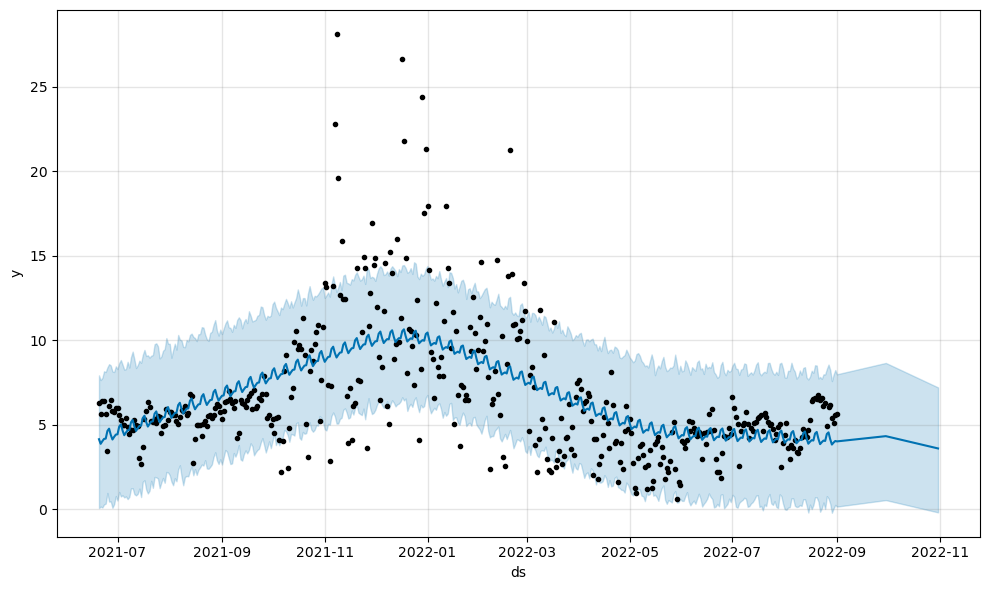

In [9]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

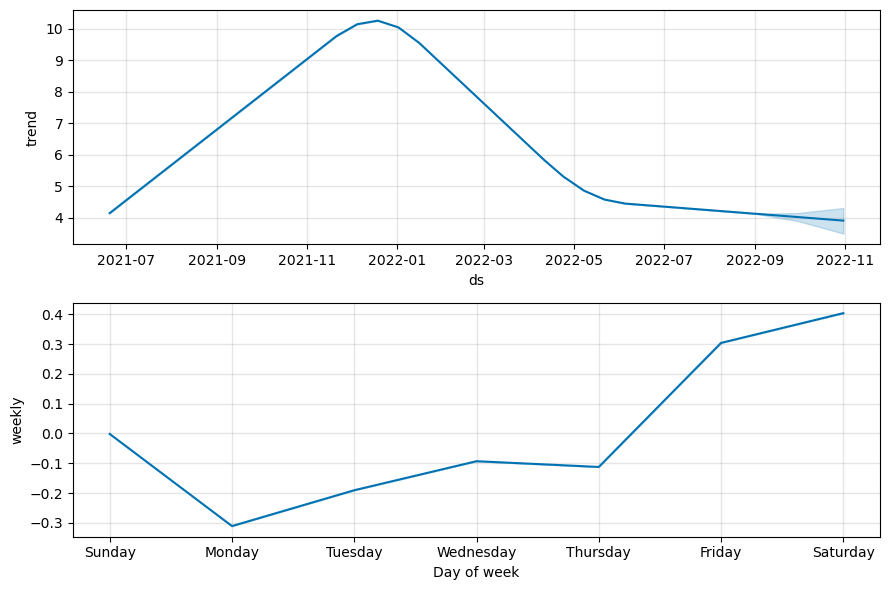

In [10]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [11]:
pm2 = data.drop('PM1(mcg/m³)', axis=1)
pm2 = pm2.drop('PM10(mcg/m³)', axis=1)

In [12]:
# python code to rename the columns
pm2.rename(columns={'Day':'ds','PM2.5(mcg/m³)':'y'},inplace=True)

In [13]:
pm2.head()

,ds,y
0,2021-06-20,21.02
1,2021-06-21,15.63
2,2021-06-22,11.60
3,2021-06-23,12.40
4,2021-06-24,11.68


In [14]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm2)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

13:48:02 - cmdstanpy - INFO - Chain [1] start processing
13:48:03 - cmdstanpy - INFO - Chain [1] done processing


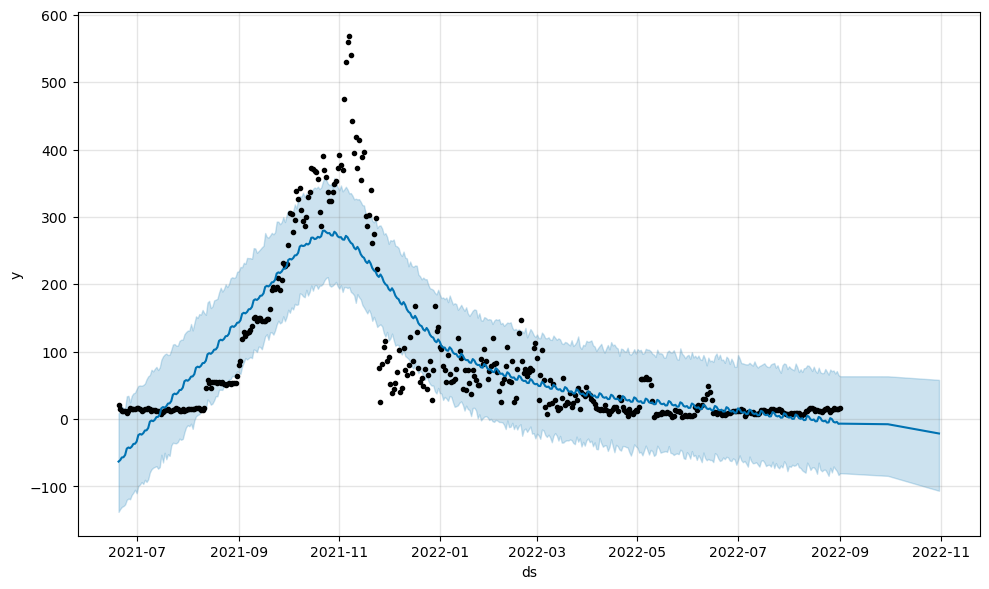

In [15]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

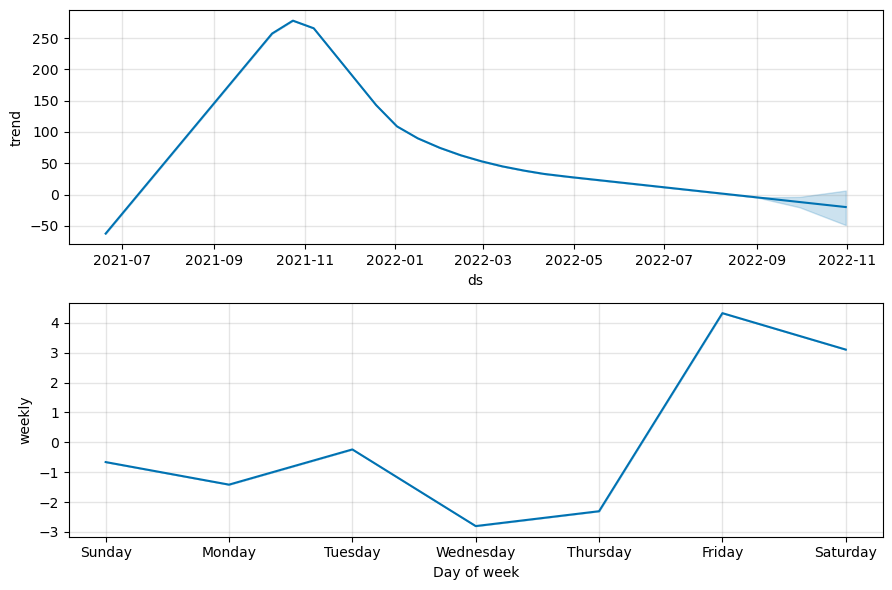

In [16]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [17]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis=1)

In [18]:
# python code to rename the columns
pm10.rename(columns={'Day':'ds','PM10(mcg/m³)':'y'},inplace=True)

In [19]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm10)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

13:48:24 - cmdstanpy - INFO - Chain [1] start processing
13:48:24 - cmdstanpy - INFO - Chain [1] done processing


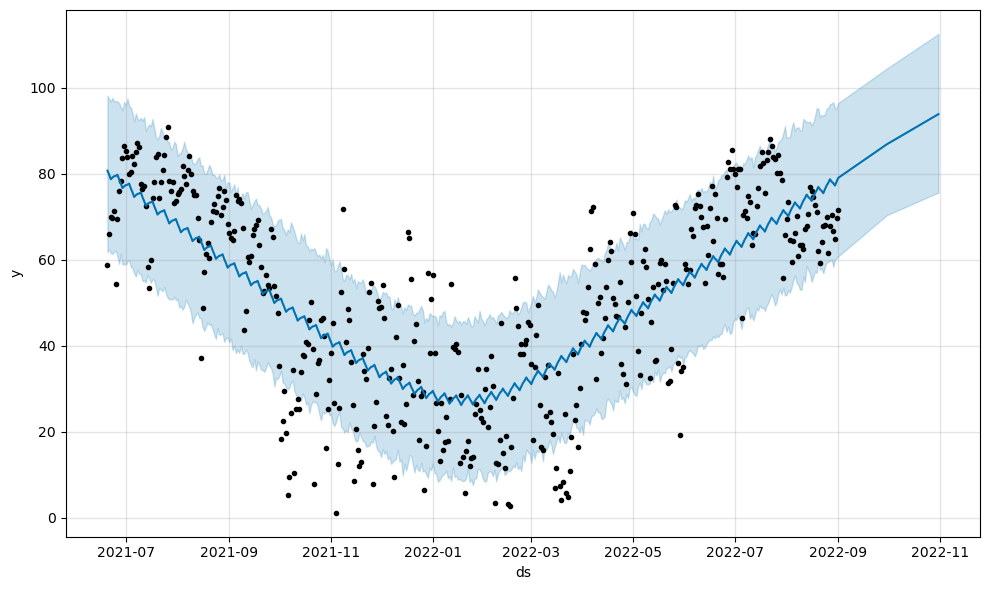

In [20]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

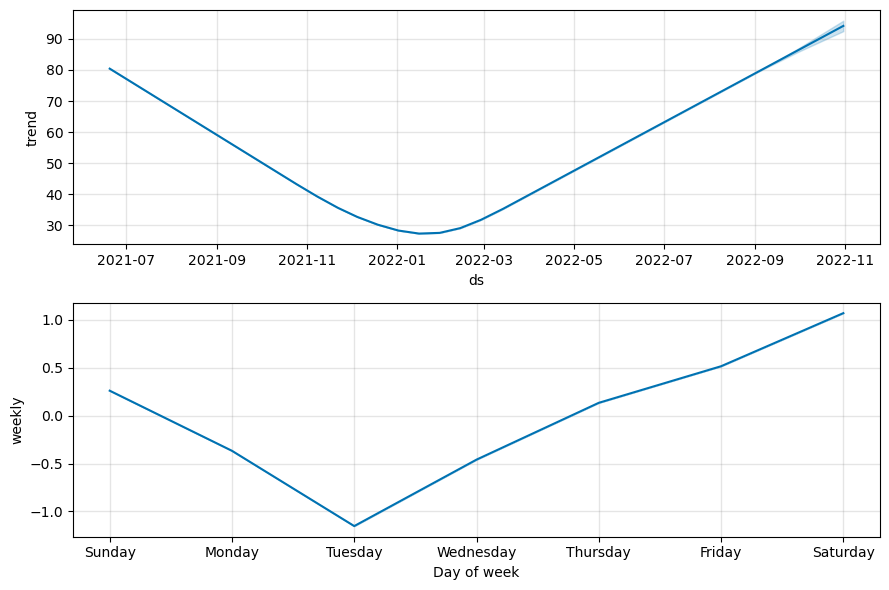

In [21]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [22]:
# importing dataset
dataset = pd.read_csv('../pm2_data.csv')

dataset.tail()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
33515,212,Bishkek,PM2.5 - Principal,2022-10-10 20:00:00,2022,10,10,20,33.7,96,Moderate,46.0,UG/M3,1 Hr,Valid
33516,213,Bishkek,PM2.5 - Principal,2022-10-10 21:00:00,2022,10,10,21,36.8,104,Unhealthy for Sensitive Groups,40.0,UG/M3,1 Hr,Valid
33517,214,Bishkek,PM2.5 - Principal,2022-10-10 22:00:00,2022,10,10,22,35.4,100,Moderate,34.0,UG/M3,1 Hr,Valid
33518,215,Bishkek,PM2.5 - Principal,2022-10-10 23:00:00,2022,10,10,23,33.2,95,Moderate,31.0,UG/M3,1 Hr,Valid
33519,216,Bishkek,PM2.5 - Principal,2022-10-11 00:00:00,2022,10,11,0,33.1,95,Moderate,33.0,UG/M3,1 Hr,Valid


In [23]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('Site', axis=1, inplace=True)
dataset.drop('Parameter', axis=1, inplace=True)
dataset.drop('Year', axis=1, inplace=True)
dataset.drop('Month', axis=1, inplace=True)
dataset.drop('Day', axis=1, inplace=True)
dataset.drop('Hour', axis=1, inplace=True)
dataset.drop('NowCast Conc.', axis=1, inplace=True)
dataset.drop('AQI Category', axis=1, inplace=True)
dataset.drop('Raw Conc.', axis=1, inplace=True)
dataset.drop('Conc. Unit', axis=1, inplace=True)
dataset.drop('Duration', axis=1, inplace=True)
dataset.drop('QC Name', axis=1, inplace=True)


In [24]:
dataset.head()

,Date (LT),AQI
0,2019-02-06 06:00:00,-999
1,2019-02-06 07:00:00,61
2,2019-02-06 08:00:00,66
3,2019-02-06 09:00:00,73
4,2019-02-06 10:00:00,91


In [25]:

import numpy as np
dataset['AQI'].replace(-999, np.nan, inplace=True)

In [26]:
dataset.head()

,Date (LT),AQI
0,2019-02-06 06:00:00,NaN
1,2019-02-06 07:00:00,61.0
2,2019-02-06 08:00:00,66.0
3,2019-02-06 09:00:00,73.0
4,2019-02-06 10:00:00,91.0


In [27]:
dataset.tail()

,Date (LT),AQI
33515,2022-10-10 20:00:00,96.0
33516,2022-10-10 21:00:00,104.0
33517,2022-10-10 22:00:00,100.0
33518,2022-10-10 23:00:00,95.0
33519,2022-10-11 00:00:00,95.0


In [28]:
dataset.isnull().sum()

Date (LT)      0
AQI          202
dtype: int64

In [29]:
dataset = dataset.bfill().ffill()

In [30]:
dataset["Date (LT)"] = pd.to_datetime(dataset["Date (LT)"])

In [31]:
dataset.head()

,Date (LT),AQI
0,2019-02-06 06:00:00,61.0
1,2019-02-06 07:00:00,61.0
2,2019-02-06 08:00:00,66.0
3,2019-02-06 09:00:00,73.0
4,2019-02-06 10:00:00,91.0


In [32]:
# python code to rename the columns
dataset.rename(columns={'Date (LT)':'ds','AQI':'y'},inplace=True)

In [33]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(dataset)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

13:48:42 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing


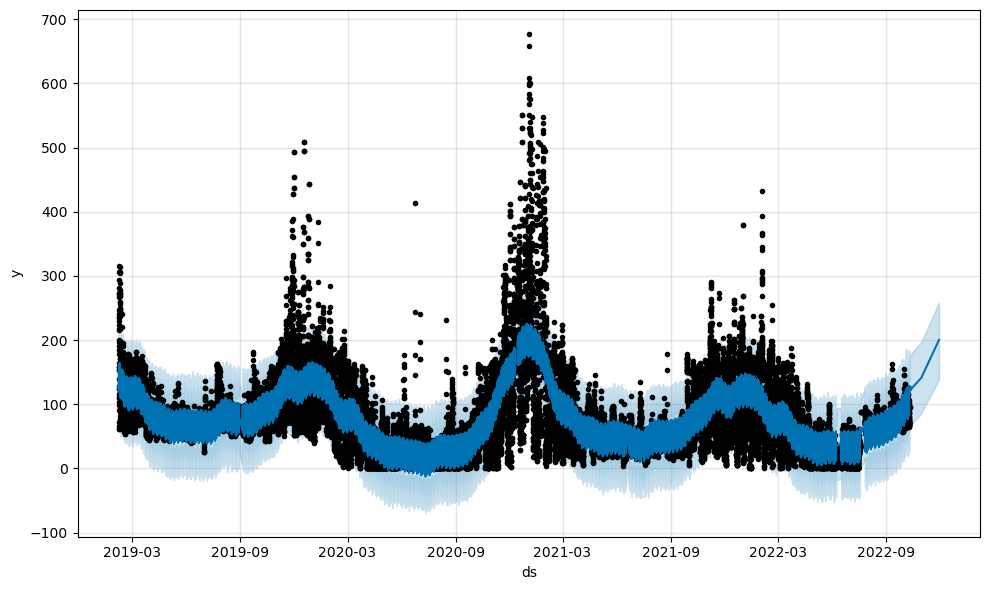

In [34]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

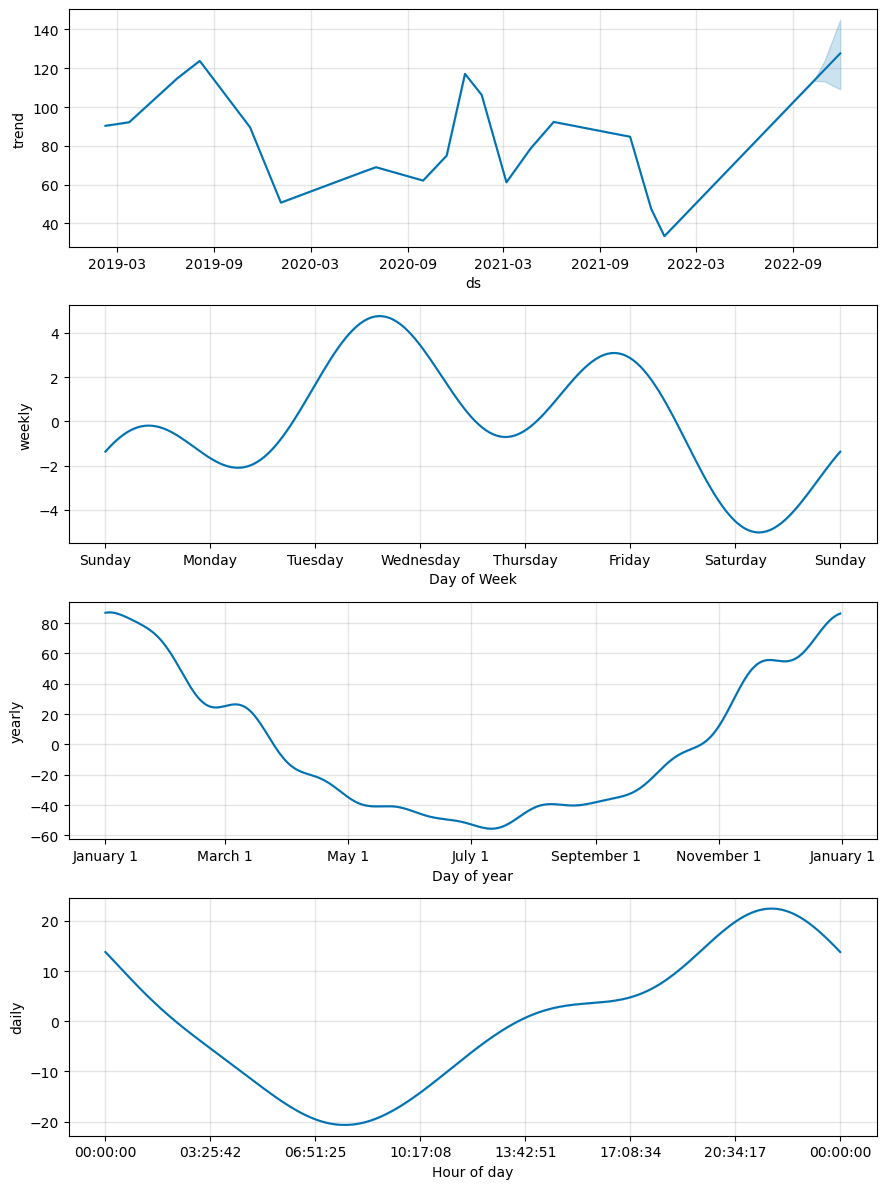

In [35]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [36]:
pm1.head()

,ds,y
0,2021-06-20,6.26
1,2021-06-21,5.61
2,2021-06-22,6.38
3,2021-06-23,6.43
4,2021-06-24,5.66


In [39]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [40]:
f = Forecaster(y=pm1['y'],
                   current_dates=pm1['ds'])

Let’s decompose this time series by viewing the PACF (Partial Auto Correlation Function) plot, which measures how much the y variable, in our case, pm1, is correlated to past values of itself and how far back a statistically significant correlation exists. The PACF plot is different from the ACF plot in that PACF controls for correlation between past terms.

/home/uca/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


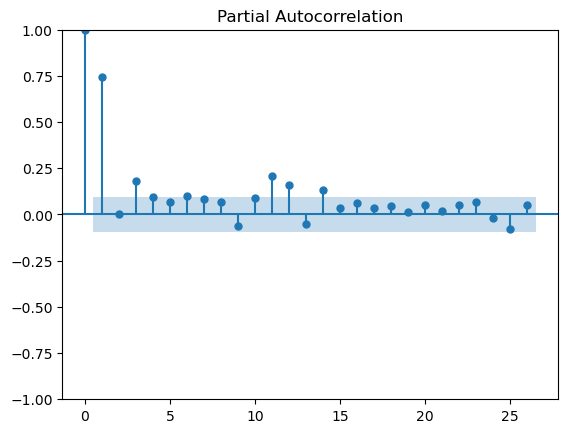

In [41]:
f.plot_pacf(lags=26)
plt.show()

Let’s further decompose the series into its trend, seasonal, and residual parts:

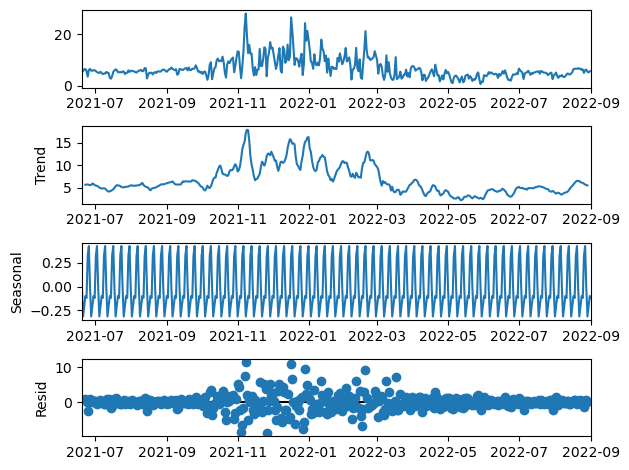

In [42]:
f.seasonal_decompose().plot()
plt.show()

In [43]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [44]:
stat

-2.006476397638362

In [45]:
pval

0.283740664335579

To model anything in scalecast, we need to complete the following three basic steps:

Specify a test length — all models are tested in scalecast with the same slice of data and at least one data point must be set aside to do so. There is no getting around this. The test length is a discrete number of the last observations in the full time series. You can pass a percentage or a discrete number to the set_test_length function.
Generate future dates —all models in scalecast produce a forecast in the same scale as the observed data. There is no getting around this. The number of dates you generate in this step will determine how long all models will be forecast out.
Choose an estimator — we will be using the “lstm” estimator, but there are a handful of others available.

In [46]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(72) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

Now, to call an LSTM forecast. By default, this model will be run with a single input layer of 8 size, Adam optimizer, tanh activation, a single lagged dependent-variable value to train with, a learning rate of 0.001, and no dropout. All data is scaled going into the model with a min-max scaler and un-scaled coming out. Anything you can pass to the fit() method in TensorFlow, you can also pass to the scalecast manual_forecast() method.

2023-04-18 13:52:21.316282: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 13:52:21.671107: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 13:52:21.672749: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 13:52:23.344300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-18 13:52:25.631367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat

1/1 [==============================] - 1s 521ms/step


2023-04-18 13:52:28.717207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:28.720101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:28.722507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 3s 4ms/step - loss: 0.2274


2023-04-18 13:52:32.820802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:32.823583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:32.826365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 0s 2ms/step


/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

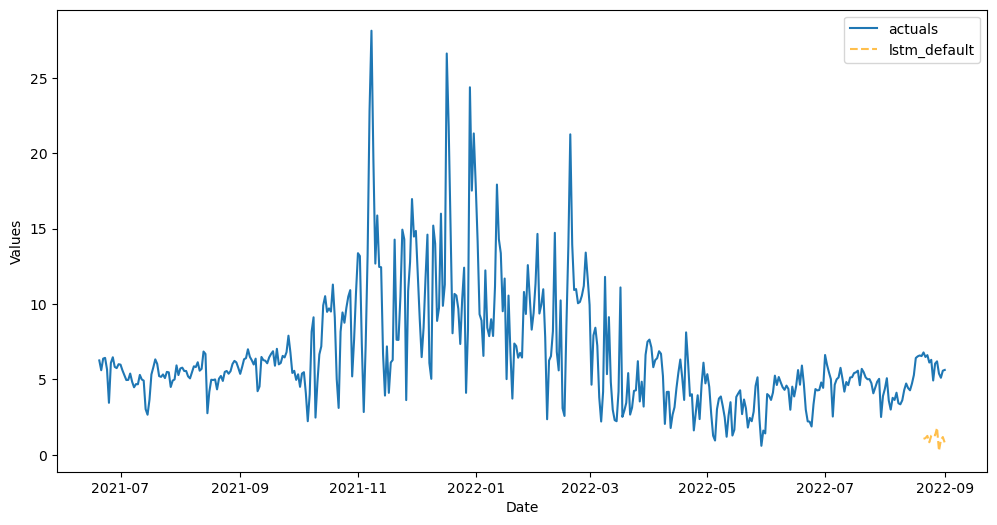

In [47]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

Let’s start simple and just give it more lags to predict with. We saw a significant autocorrelation of 24 months in the PACF, so let’s use that

2023-04-18 13:52:34.110357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:34.114191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:34.117540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 4s 14ms/step - loss: 0.2183


2023-04-18 13:52:38.246851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:38.251457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:38.253744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 605ms/step


2023-04-18 13:52:38.929145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:38.932530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:38.935093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 3s 15ms/step - loss: 0.2263


2023-04-18 13:52:42.889818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:42.892425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:42.894683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 5ms/step


/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

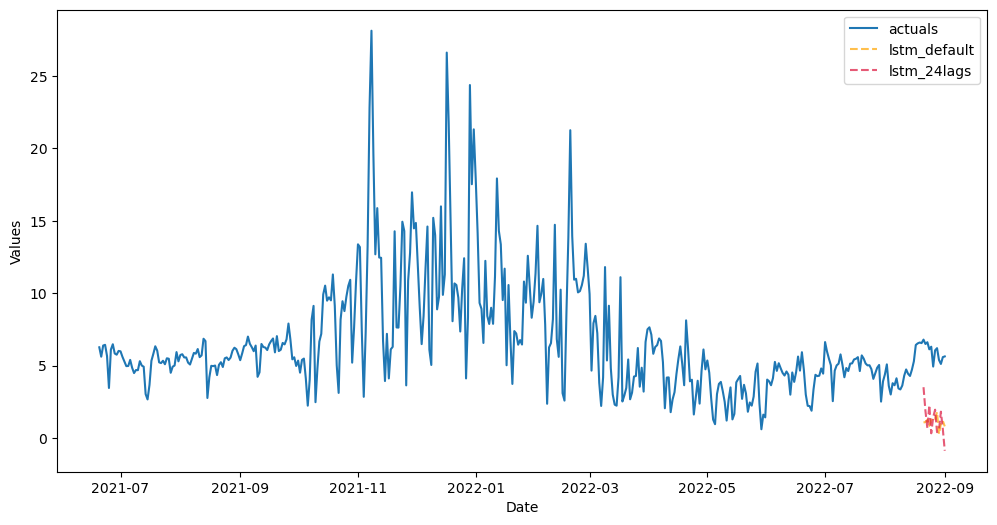

In [48]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Already, we see some noticeable improvements, but this is still not even close to ready. An obvious next step might be to give it more time to train. In this universe, more time means more epochs. Let’s see where five epochs gets us. We also validate the model while it’s training by specifying validation_split=.2 below:

Epoch 1/5


2023-04-18 13:52:44.049105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:44.051970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:44.053721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 9/10 [==========================>...] - ETA: 0s - loss: 0.2455

2023-04-18 13:52:47.341731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:47.345187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:47.348949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 3s 101ms/step - loss: 0.2422 - val_loss: 0.1200
Epoch 2/5
10/10 [==============================] - 0s 21ms/step - loss: 0.2227 - val_loss: 0.1031
Epoch 3/5
10/10 [==============================] - 0s 22ms/step - loss: 0.2023 - val_loss: 0.0866
Epoch 4/5
10/10 [==============================] - 0s 22ms/step - loss: 0.1825 - val_loss: 0.0735
Epoch 5/5
10/10 [==============================] - 0s 22ms/step - loss: 0.1651 - val_loss: 0.0686


2023-04-18 13:52:48.903409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:48.905851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:48.907788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 608ms/step
Epoch 1/5


2023-04-18 13:52:49.445435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:49.447386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:49.449064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - ETA: 0s - loss: 0.2593

2023-04-18 13:52:52.566638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:52.570049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:52.572117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 3s 92ms/step - loss: 0.2593 - val_loss: 0.1181
Epoch 2/5
9/9 [==============================] - 0s 21ms/step - loss: 0.2405 - val_loss: 0.1038
Epoch 3/5
9/9 [==============================] - 0s 22ms/step - loss: 0.2197 - val_loss: 0.0886
Epoch 4/5
9/9 [==============================] - 0s 22ms/step - loss: 0.1961 - val_loss: 0.0743
Epoch 5/5
1/1 [==============================] - 1s 615ms/step


2023-04-18 13:52:54.104392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:54.107220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:54.109437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 5ms/step


/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags_5epochs. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

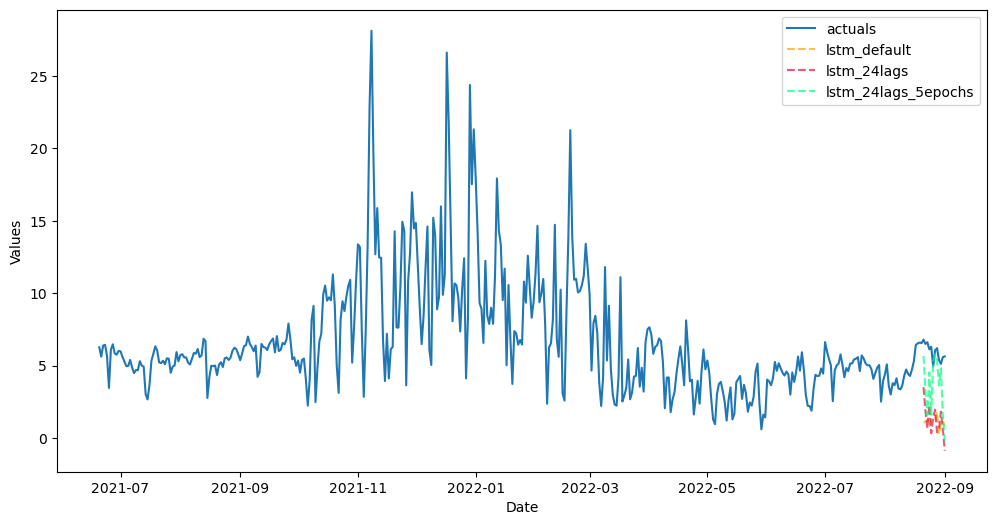

In [49]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Again, closer. A couple values even fall within the 95% confidence interval this time. Next, let’s try increasing the number of layers in the network to 3, increasing epochs to 25, but monitoring the validation loss value and telling the model to quit after more than 5 iterations in which that doesn’t improve. This is known as early stopping.

2023-04-18 13:52:55.472433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:55.475723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:55.479075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/25


2023-04-18 13:52:56.656912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:52:56.661364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:52:56.664071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 9/10 [==========================>...] - ETA: 0s - loss: 0.2269

2023-04-18 13:53:04.954918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:04.957577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:04.959561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 9s 206ms/step - loss: 0.2234 - val_loss: 0.0877
Epoch 2/25
10/10 [==============================] - 0s 48ms/step - loss: 0.1592 - val_loss: 0.0829
Epoch 3/25
10/10 [==============================] - 1s 52ms/step - loss: 0.1313 - val_loss: 0.0547
Epoch 4/25
10/10 [==============================] - 0s 50ms/step - loss: 0.1147 - val_loss: 0.0447
Epoch 5/25
10/10 [==============================] - 1s 52ms/step - loss: 0.1033 - val_loss: 0.0385
Epoch 6/25
10/10 [==============================] - 1s 51ms/step - loss: 0.0970 - val_loss: 0.0380
Epoch 7/25
10/10 [==============================] - 0s 48ms/step - loss: 0.0935 - val_loss: 0.0344
Epoch 8/25
10/10 [==============================] - 1s 52ms/step - loss: 0.0920 - val_loss: 0.0351
Epoch 9/25
10/10 [==============================] - 1s 52ms/step - loss: 0.0914 - val_loss: 0.0353
Epoch 10/25
10/10 [==============================] - 0s 48ms/step - loss: 0.0912 - val_loss: 0.0350
Epoch 11/25
10/10 [

2023-04-18 13:53:11.933874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:11.937070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:11.939636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 2s 2s/step


2023-04-18 13:53:13.447461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:13.450103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:13.452325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/25


2023-04-18 13:53:14.128960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:14.132553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:14.135025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - ETA: 0s - loss: 0.2548

2023-04-18 13:53:24.054807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:24.059706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:24.062268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 11s 268ms/step - loss: 0.2548 - val_loss: 0.1104
Epoch 2/25
9/9 [==============================] - 0s 52ms/step - loss: 0.2244 - val_loss: 0.0868
Epoch 3/25
9/9 [==============================] - 0s 50ms/step - loss: 0.1871 - val_loss: 0.0999
Epoch 4/25
9/9 [==============================] - 0s 47ms/step - loss: 0.1597 - val_loss: 0.0721
Epoch 5/25
9/9 [==============================] - 0s 53ms/step - loss: 0.1388 - val_loss: 0.0727
Epoch 6/25
9/9 [==============================] - 0s 52ms/step - loss: 0.1276 - val_loss: 0.0574
Epoch 7/25
9/9 [==============================] - 0s 52ms/step - loss: 0.1208 - val_loss: 0.0576
Epoch 8/25
9/9 [==============================] - 0s 52ms/step - loss: 0.1169 - val_loss: 0.0483
Epoch 9/25
9/9 [==============================] - 0s 55ms/step - loss: 0.1152 - val_loss: 0.0516
Epoch 10/25
9/9 [==============================] - 0s 55ms/step - loss: 0.1144 - val_loss: 0.0476
Epoch 11/25
9/9 [=====================

2023-04-18 13:53:33.467778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:33.470257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:33.472061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 11ms/step


/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags_5epochs. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for lstm_24lags_earlystop_3layers. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

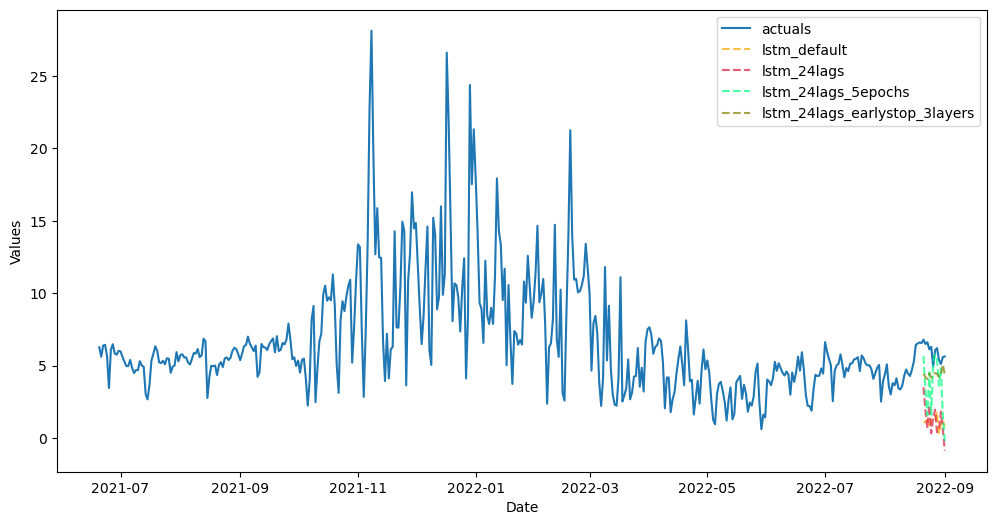

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

2023-04-18 13:53:35.566127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:35.568357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:35.570162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2023-04-18 13:53:37.608272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:37.610933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:37.612945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-18 13:53:42.372007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:42.375114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:42.377039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - ETA: 0s - loss: 0.1645

2023-04-18 13:53:48.008053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:53:48.010898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:53:48.013001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 12s 301ms/step - loss: 0.1645 - val_loss: 0.0383
Epoch 2/15
10/10 [==============================] - 1s 99ms/step - loss: 0.1018 - val_loss: 0.0328
Epoch 3/15
10/10 [==============================] - 1s 100ms/step - loss: 0.0982 - val_loss: 0.0365
Epoch 4/15
10/10 [==============================] - 1s 100ms/step - loss: 0.0968 - val_loss: 0.0348
Epoch 5/15
10/10 [==============================] - 1s 100ms/step - loss: 0.0972 - val_loss: 0.0342
Epoch 6/15
10/10 [==============================] - 1s 101ms/step - loss: 0.0961 - val_loss: 0.0390
Epoch 7/15
10/10 [==============================] - 1s 102ms/step - loss: 0.0962 - val_loss: 0.0459
Epoch 8/15
10/10 [==============================] - 1s 101ms/step - loss: 0.0952 - val_loss: 0.0409
Epoch 9/15
10/10 [==============================] - 1s 100ms/step - loss: 0.0935 - val_loss: 0.0426
Epoch 10/15
10/10 [==============================] - 1s 100ms/step - loss: 0.0963 - val_loss: 0.0441
Epoch 11/1

2023-04-18 13:54:03.806973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:03.810205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:03.812393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 2s 2s/step


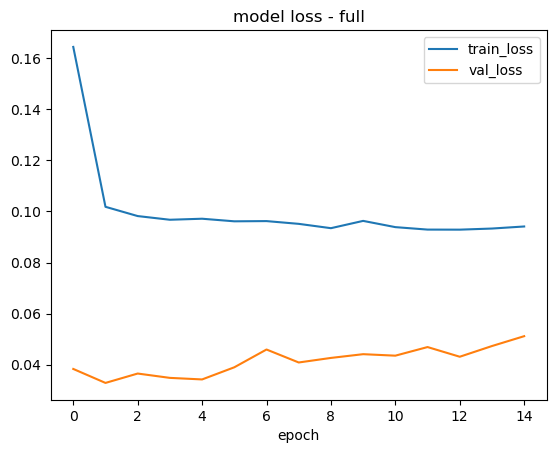

2023-04-18 13:54:05.931598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:05.934176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:05.936098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2023-04-18 13:54:06.927220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:06.929455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:06.931708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-04-18 13:54:11.408403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:11.411007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:11.412987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - ETA: 0s - loss: 0.2155

2023-04-18 13:54:16.670432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:16.673207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:16.675541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 12s 378ms/step - loss: 0.2155 - val_loss: 0.0699
Epoch 2/15
9/9 [==============================] - 1s 101ms/step - loss: 0.1357 - val_loss: 0.0516
Epoch 3/15
9/9 [==============================] - 1s 103ms/step - loss: 0.1230 - val_loss: 0.0743
Epoch 4/15
9/9 [==============================] - 1s 100ms/step - loss: 0.1226 - val_loss: 0.0666
Epoch 5/15
9/9 [==============================] - 1s 100ms/step - loss: 0.1214 - val_loss: 0.0669
Epoch 6/15
9/9 [==============================] - 1s 103ms/step - loss: 0.1217 - val_loss: 0.0719
Epoch 7/15
9/9 [==============================] - 1s 102ms/step - loss: 0.1220 - val_loss: 0.0423
Epoch 8/15
9/9 [==============================] - 1s 100ms/step - loss: 0.1201 - val_loss: 0.0453
Epoch 9/15
9/9 [==============================] - 1s 101ms/step - loss: 0.1185 - val_loss: 0.0431
Epoch 10/15
9/9 [==============================] - 1s 100ms/step - loss: 0.1182 - val_loss: 0.0440
Epoch 11/15
9/9 [============

2023-04-18 13:54:31.741348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:54:31.744119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:54:31.745873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 0s 34ms/step


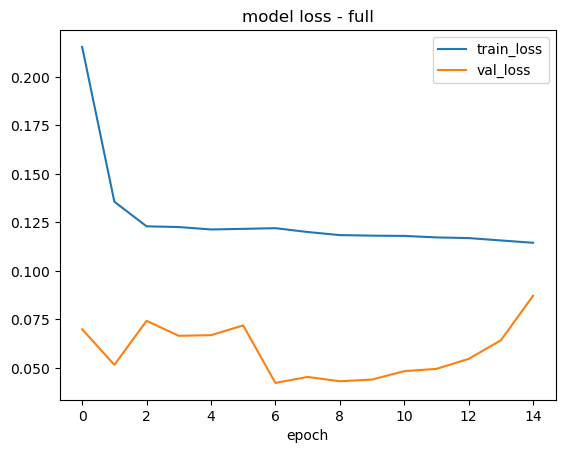

ValueError: determine_best_by must be one of ['TestSetRMSE', 'TestSetMAPE', 'TestSetMAE', 'TestSetR2', 'InSampleRMSE', 'InSampleMAPE', 'InSampleMAE', 'InSampleR2', 'ValidationMetricValue'], got LevelTestSetMAPE.

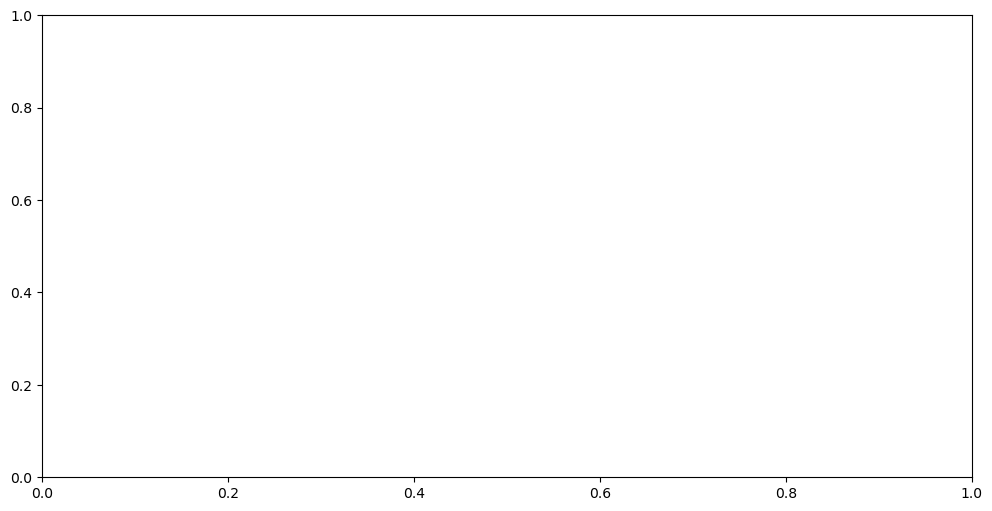

In [51]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

Now that we finally found an acceptable LSTM model, let’s benchmark it against a simple model, the simplest model, Multiple Linear Regression (MLR), to see just how much time we wasted.

To switch from an LSTM to an MLR model in scalecast, we need to follow these steps:

Choose the MLR estimator — just like how we previously chose the LSTM estimator.
Add regressors to the model —in LSTM, we only used the series’ own history and let the model parameterize itself. With MLR, we can still use the series’ own history, but we can also add information about which month, quarter, or year any given observation falls into to capture seasonality and a time trend (among other options). We could even ingest a dataframe of our own regressors (not shown here).
Difference non-stationary data — this is how we mitigate the results of the Augmented Dickey-Fuller test showing we had non-stationary data. We could have done this with LSTM as well, but we were hoping it was sophisticated enough to work without this step.
This is all accomplished in the code below:

In [52]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

AttributeError: 'Forecaster' object has no attribute 'diff'

2023-04-18 13:55:56.659059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:55:56.661598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:55:56.663308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: determine_best_by must be one of ['TestSetRMSE', 'TestSetMAPE', 'TestSetMAE', 'TestSetR2', 'InSampleRMSE', 'InSampleMAPE', 'InSampleMAE', 'InSampleR2', 'ValidationMetricValue'], got LevelTestSetMAPE.

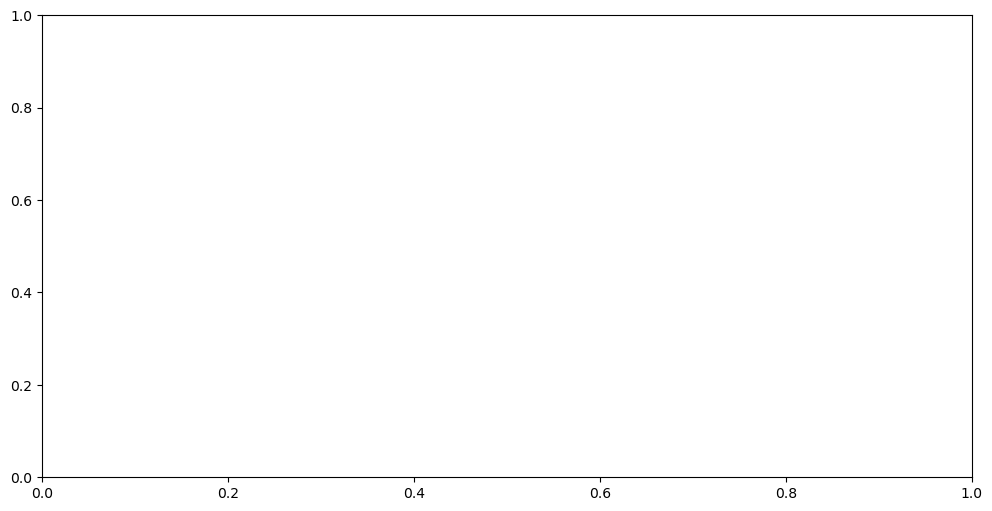

In [53]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

/home/uca/.local/lib/python3.10/site-packages/scalecast/_utils.py:55: Warning: Confidence intervals not found for mlr. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

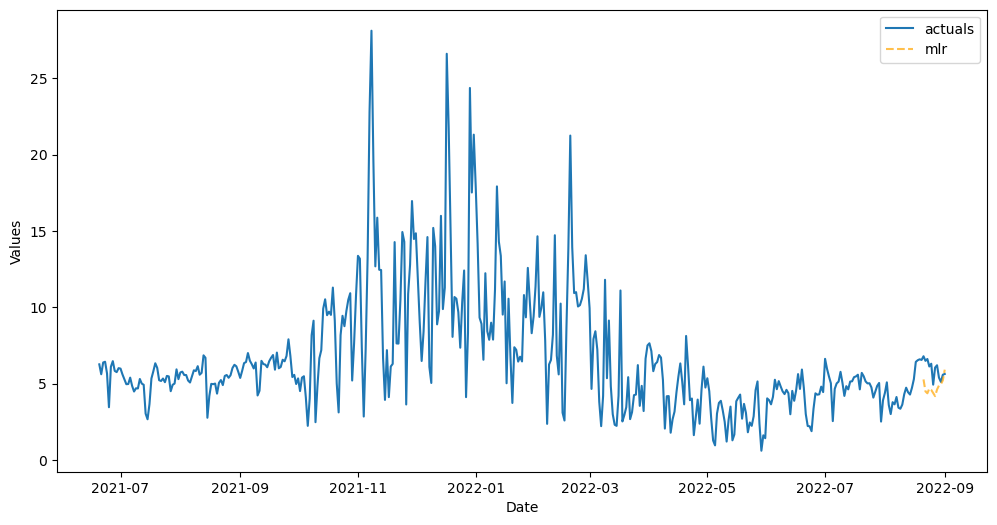

In [54]:
f.plot_test_set(models='mlr',ci=True)

We can then see our models’ predictions on future data:

<AxesSubplot:xlabel='Date', ylabel='Values'>

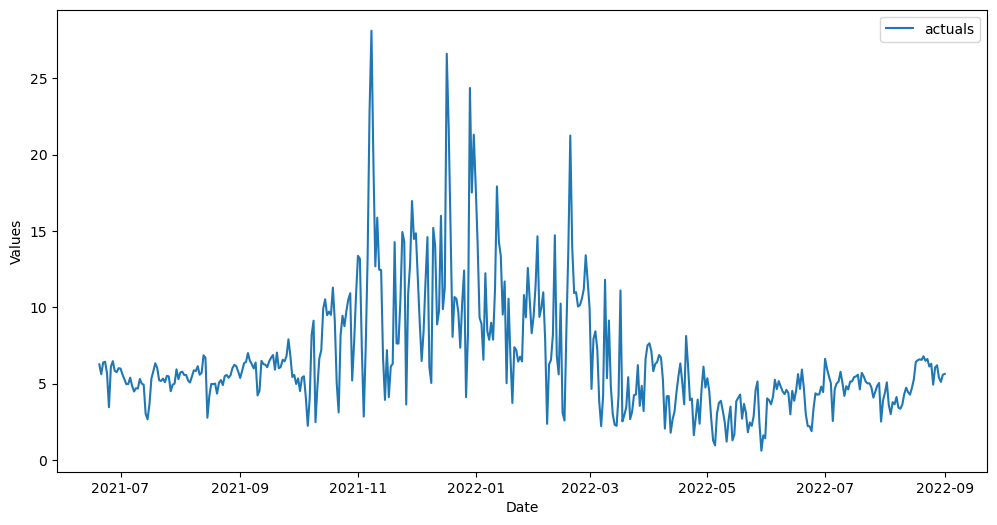

In [56]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE')